In [4]:
import re
corpus = 'I have 11 cats.'
pattern = r'\d+'
re.findall(pattern, corpus)

['11']

In [5]:
pattern = r'\w+'
re.findall(pattern, corpus)

['I', 'have', '11', 'cats']

In [6]:
pattern = r'(\d+|\w+)'
re.findall(pattern, corpus)

['I', 'have', '11', 'cats']

In [52]:
# 分群
text = 'I used Windows 10 as my OS. He bought Windows 2019 as well'
text = re.sub(r"(Windows)\s(\d+)", "\g<1>-\g<2>" , text)
text

'I used Windows-10 as my OS. He bought Windows-2019 as well'

In [48]:
# 怎樣處理多空格
text = 'I used Windows 10 as my OS. He bought Windows    2019 as well'
text = re.sub(r"(Windows)\s{1,}(\d+)", "\g<1>-\g<2>" , text)
text

'I used Windows-10 as my OS. He bought Windows-2019 as well'

In [36]:
# 怎樣大小通吃 Windows-10 , windows-10 
text = 'I used Windows 10 as my OS. He bought windows 2019 as well'
#text = re.sub(r"(Windows|windows)\s(\d+)", "\g<1>-\g<2>" , text)
#text = re.sub(r"(W|windows)\s(\d+)", "\g<1>-\g<2>" , text)
text = re.sub(r"([Ww]indows)\s(\d+)", "\g<1>-\g<2>" , text)
text

'I used Windows-10 as my OS. He bought windows-2019 as well'

In [40]:
# 怎樣大小通吃 Windows-10 , window-10 少個s
text = 'I used Windows 10 as my OS. He bought window 95 as well'
text = re.sub(r"([Ww]indows{0,1})\s(\d+)", "Windows-\g<2>" , text)
text

'I used Windows-10 as my OS. He bought Windows-95 as well'

In [60]:
sample ='my text includs a-z or a.z and others a-z.'
pattern = r'(a-z)'
re.findall(pattern, sample)


['a-z', 'a-z']

In [82]:
sample ='my text includes a-z or a+++z and others a-z.'
pattern = r'(\s+|\+{1,})'
re.findall(pattern, sample)


[' ', ' ', ' ', ' ', ' ', '+++', ' ', ' ', ' ']

In [81]:
sentence = 'match lowercase spaces nums like 12, but no commas'
pattern = r'[a-z0-9\s]+'
re.match(pattern, sentence)

<_sre.SRE_Match object; span=(0, 35), match='match lowercase spaces nums like 12'>

In [89]:
# 特別 [^A-Z] [^表示不是]
# 除了A-Z a-z 0-9 空白這些字元，其他都移除
text ='my text includes A or B or C or a+++z and others a-z.'
pattern = r'[^A-Za-z0-9 ]'
text = re.sub(pattern, '',  text)
text

'my text includes A or B or C or az and others az'

In [105]:
# 針對敏感資料有特定格式者 進行移除 session id:okdofkdsofksofksofksoskdf 
text ='''session id:00-99-88
account id:lewis'''
text = re.sub(r'session id\W*:.*\n', '', text)
text

'account id:lewis'

In [115]:
# 僅取三碼以內
mydata = 'my IP is 127.0.0.1 , 10.30.48.148 and 52.76.89.9. But she gave me one IP 1277.0.0.1 '
pattern = r'(\d+\.\d{,3}\.\d{,3}\.\d{,3})'
re.findall(pattern, mydata)

['127.0.0.1', '10.30.48.148', '52.76.89.9', '1277.0.0.1']

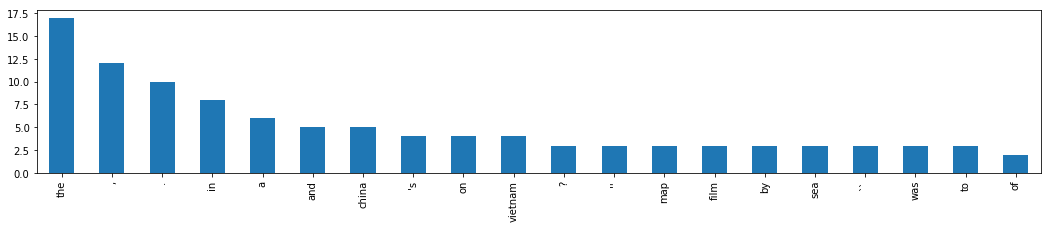

In [142]:
%matplotlib inline
# 實戰演練
news = '''Abominable, about a Chinese girl who discovers a yeti on her roof, is a joint China-DreamWorks production.

The map shows China's unilaterally declared "nine-dash line", which carves out a huge area in the sea that Vietnam lays claim to.

China and Vietnam have been locked in a recent standoff in the region.

The latest dispute started in July when China conducted an energy survey in waters controlled by Vietnam.

Why is the South China Sea contentious?
Taiwan, the Philippines, Brunei, Malaysia and Vietnam all make claims to parts of the sea.

What's in the controversial scene?
The film, jointly produced by Shanghai-based Pearl Studio and DreamWorks Animation, was first shown in Vietnamese cinemas on 4 October.

The controversial scene shows China's "nine dash line" on a map in the background. What has the reaction been?
Vietnamese viewers quickly spotted the map and started sharing screenshots on social media.

The government swiftly announced that the film was to be pulled from cinemas.

"We will revoke [the film's license]," Ta Quang Dong, deputy minister of culture, sports and tourism, was quoted as saying by the Thanh Nien newspaper.'''

from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(18,3))
pd.Series(word_tokenize(news.lower())).value_counts()[:20].plot(kind='bar')
plt.show()

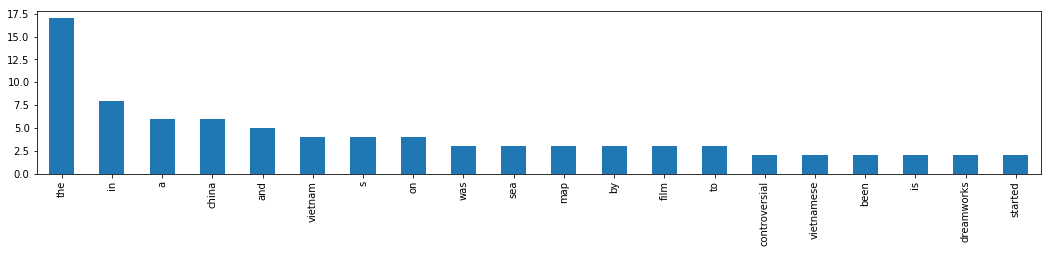

In [143]:
# 不同切自方法 re.findall(r'\w+')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(18,3))
pd.Series(re.findall(r'\w+', news.lower())).value_counts()[:20].plot(kind='bar')
plt.show()

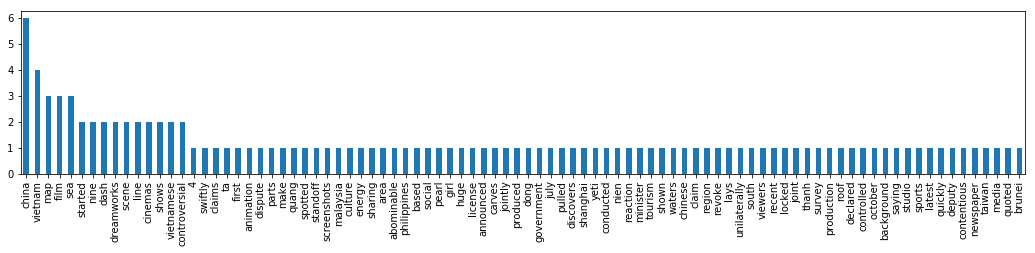

In [144]:
# 去除is a the and 字頻 = tf
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords # 請選上述的兩種方式任一個 去除 stopwords


plt.figure(figsize=(18,3))
words = [i for i in re.findall(r'\w+', news.lower()) if i not in stopwords ] # list comprehensive
pd.Series(words).value_counts().plot(kind='bar')
plt.show()